In [ ]:
#pip install plotly


In [3]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


## This notebook deals with Data Overview and Data Viz

In [4]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [5]:
# Loading Data
df = pd.read_csv('diabetes.csv')
# Getting dataframe columns names
df_name=df.columns
df_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()
# We have 768 unique records and 9 variables. Also we do not have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()
# Outcome will be our target variable.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


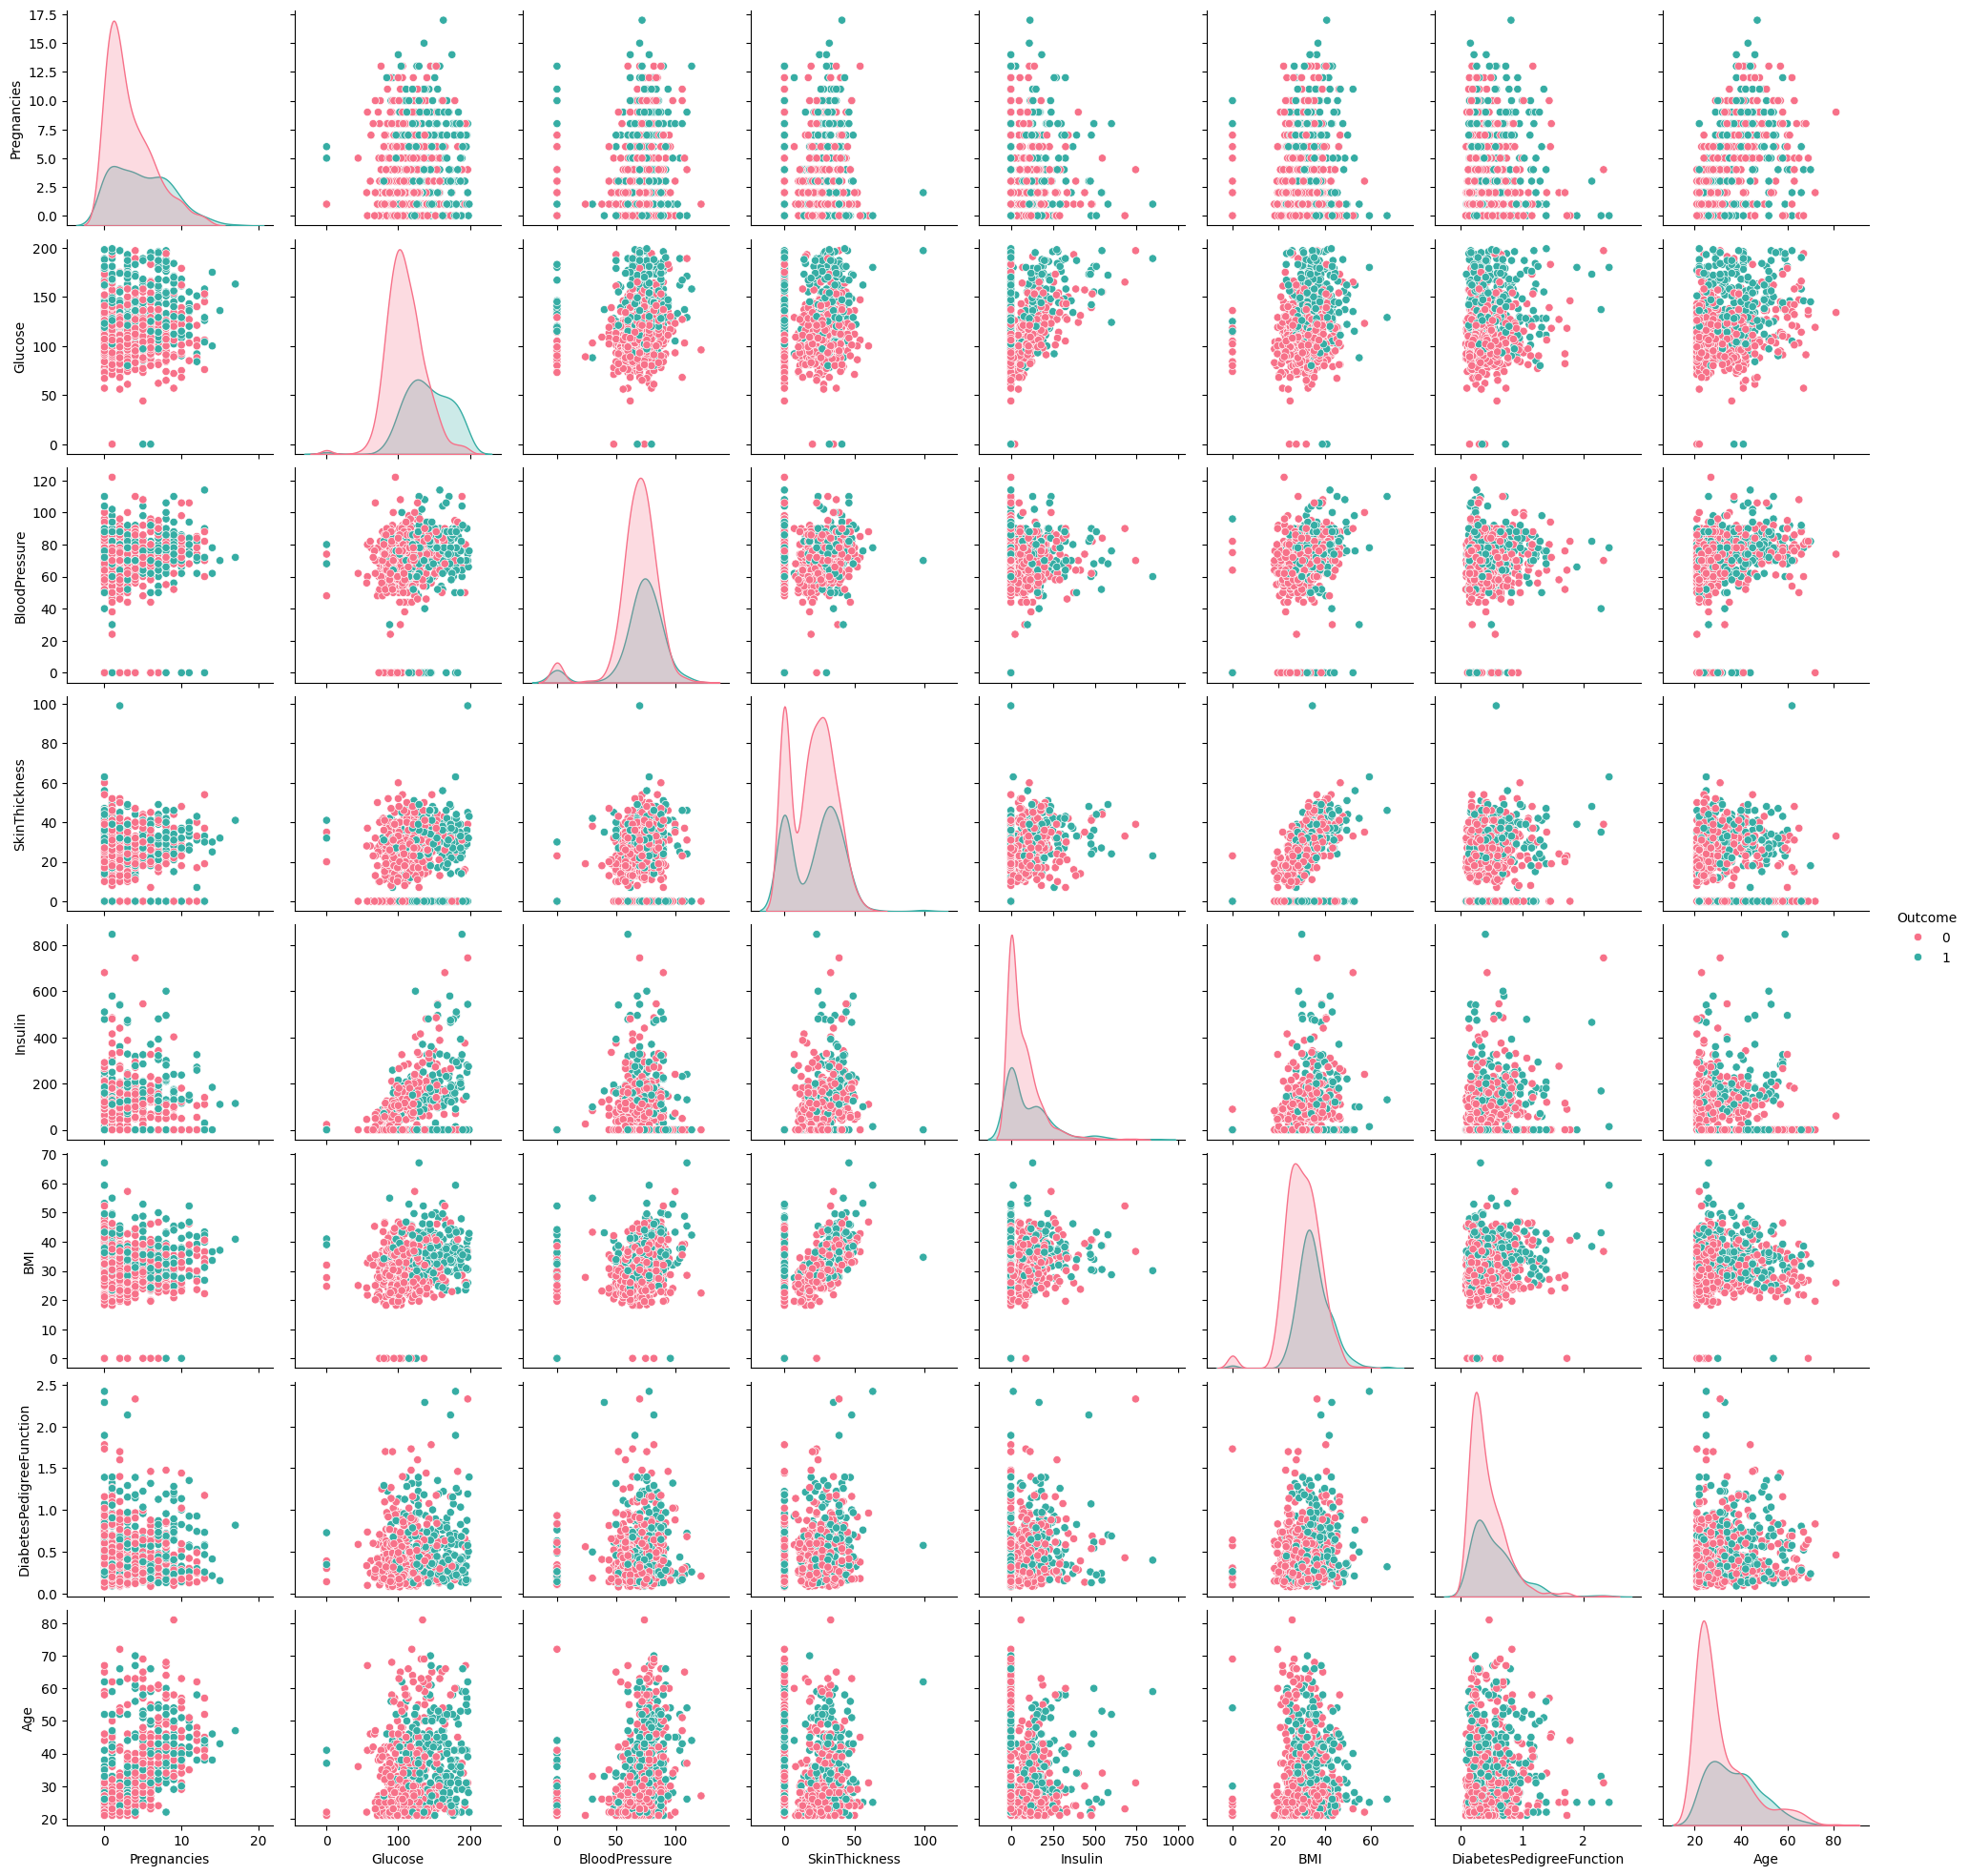

In [9]:
sns.pairplot(df, hue="Outcome", palette="husl")
# Looks like data sufferes from some outfiers

### UNIVARIATE and BIVARIATE ANALYSIS

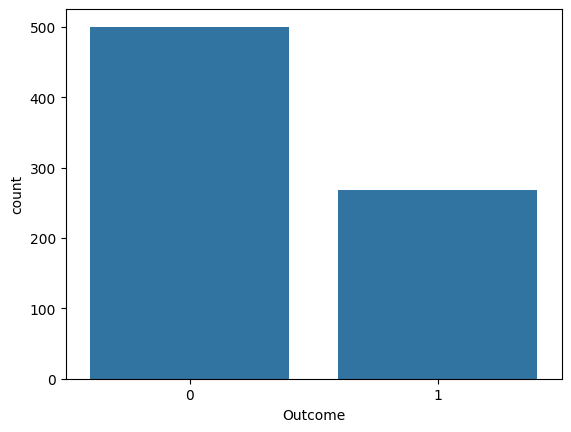

In [10]:
sns.countplot(x='Outcome',data=df)
plt.show()
# We have imbalanced dataset with non-diabetic people more than diabetic people

In [11]:
df['Outcome'].value_counts()
# So we have 500 non-diabetic and 268 diabetic patients 

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_14088\1052536021.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Freq/Dist')

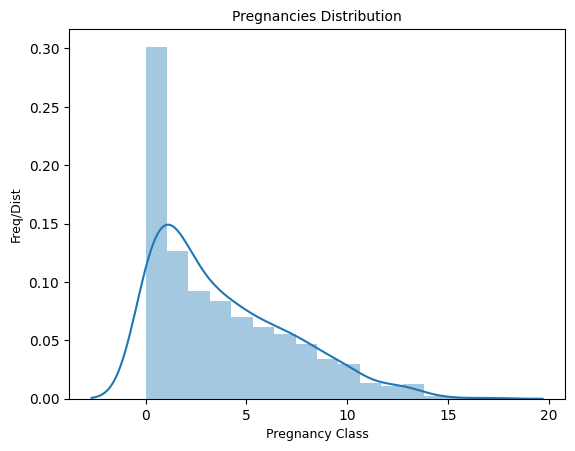

In [12]:
plt = sns.distplot(df['Pregnancies'])
plt.set_title('Pregnancies Distribution',fontdict={'fontsize':10})
plt.set_xlabel('Pregnancy Class',fontdict={'fontsize':9})
plt.set_ylabel('Freq/Dist',fontdict={'fontsize':9})
# We have right skewed plot for pregnancy 


In [13]:
df['Pregnancies'].value_counts()
# 17 pregnancies looks like an outlier


Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

AttributeError: 'Axes' object has no attribute 'show'

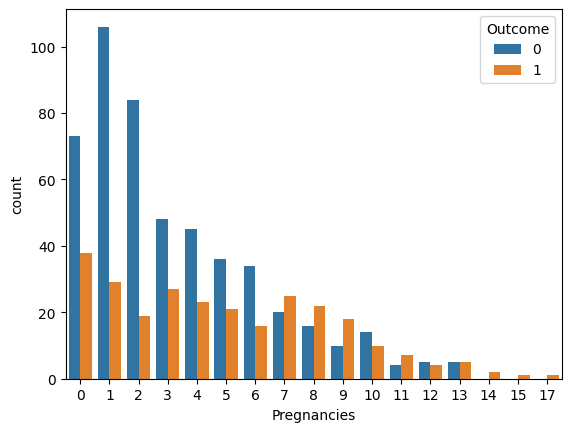

In [14]:
sns.countplot(x='Pregnancies',data=df, hue= 'Outcome')
plt.show()

In [15]:
# Defining a function for our plot1 which we will use for our other variables as well 
# This plot is for distribution of the varibale
def plot1(data):
    plt1 = sns.distplot(data)
    plt1.set_title(data.name +' Distribution',fontdict={'fontsize':10})
    plt1.set_xlabel(data.name +' Class',fontdict={'fontsize':9})
    plt1.set_ylabel('Count/Dist',fontdict={'fontsize':9})


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




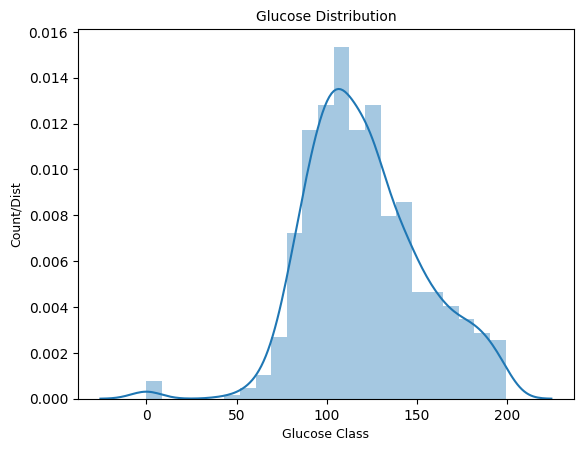

In [16]:
plot1(df['Glucose'])

In [17]:
# Lets consider varibale with Diabetic vs Non-Diabetic condition
def plot2(frame,var):
    plt2=sns.distplot(frame[frame.Outcome==False][var.name],color='green',label='Non-Diabetic')
    sns.distplot(frame[frame.Outcome==True][var.name],color='red',label='Diabetic')
    plt2.set_title('Distribution of '+var.name,fontdict={'fontsize':10})
    plt2.set_xlabel(var.name,fontdict={'fontsize':9})
    plt2.set_ylabel('Count/Dist.',fontdict={'fontsize':9})
    plt2.axes.legend(loc=0)


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




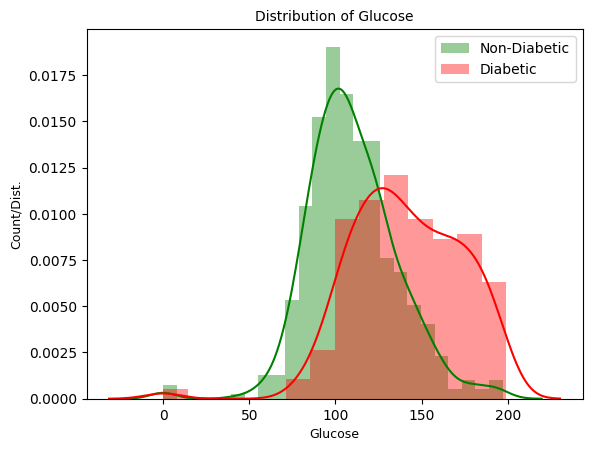

In [18]:
plot2(df,df['Glucose'])
# Clearly diabetic and non diabetic patient's glucose level are overlapping between 90-120 approx


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




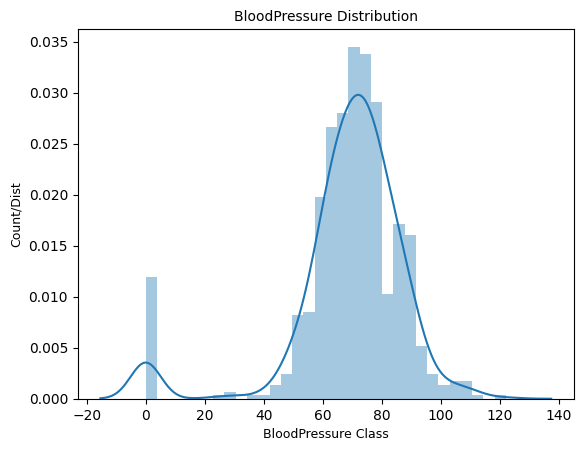

In [19]:
# Repeating above for other variables
plot1(df['BloodPressure'])
# Here clearly we can see outliers at 0

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




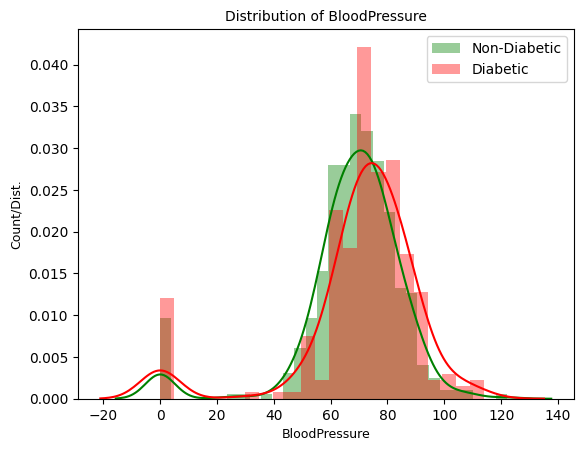

In [20]:
plot2(df,df['BloodPressure'])
# Thats almost complete overlapping.


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




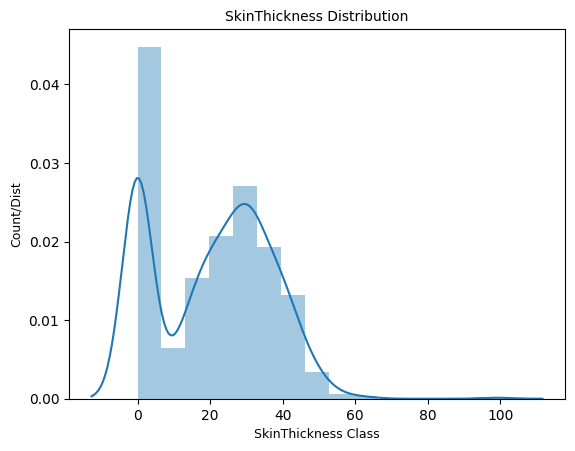

In [21]:
# Same plot for skin thickness
plot1(df['SkinThickness'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




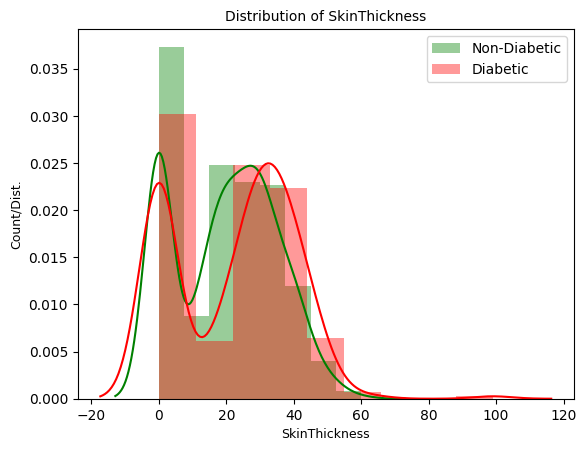

In [22]:
plot2(df,df['SkinThickness'])
# Here also we have an overlapping

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




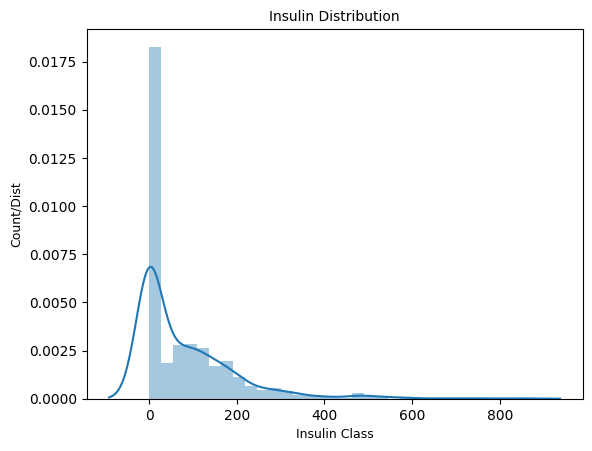

In [23]:
plot1(df['Insulin'])
# Insulin follows almost power law distribution
# Maximum values are 0

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




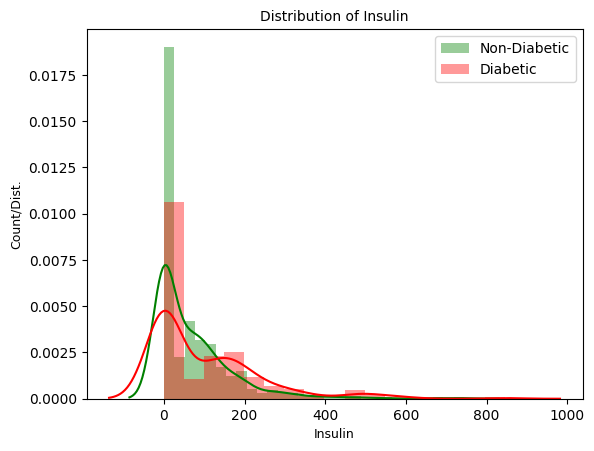

In [24]:
plot2(df,df['Insulin'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




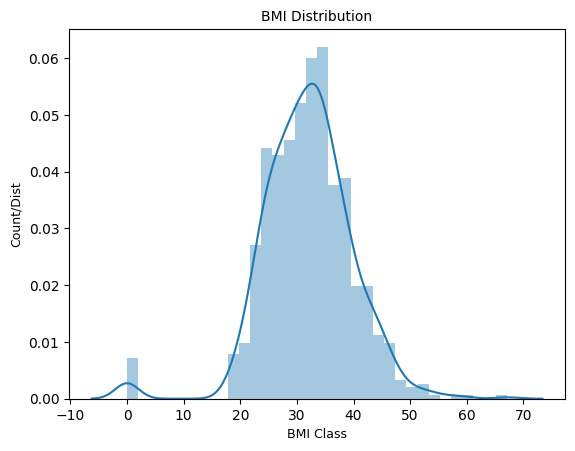

In [25]:
plot1(df['BMI'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




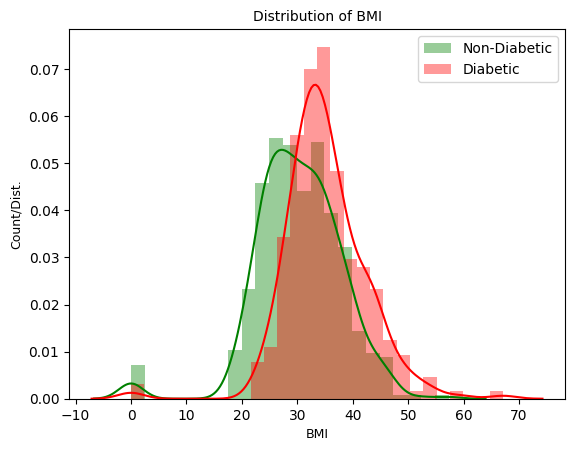

In [30]:
plot2(df,df['BMI'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




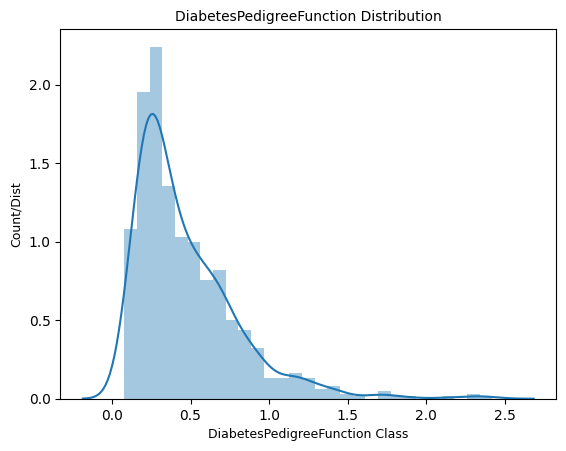

In [29]:
plot1(df['DiabetesPedigreeFunction'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




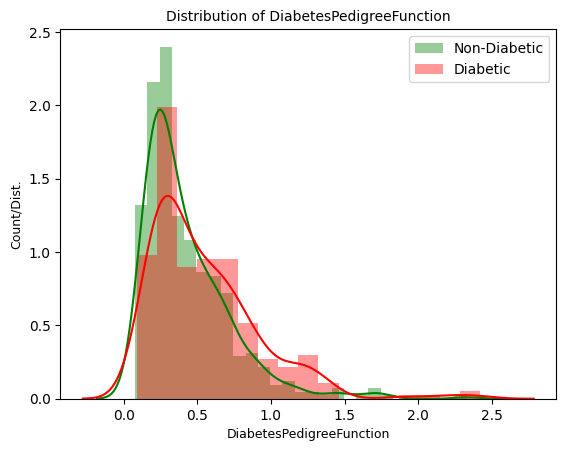

In [28]:
plot2(df,df['DiabetesPedigreeFunction'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2239848232.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




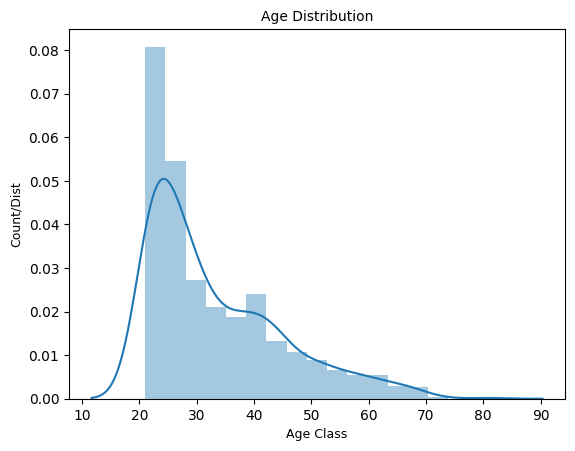

In [27]:
plot1(df['Age'])

C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14088\2998212328.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




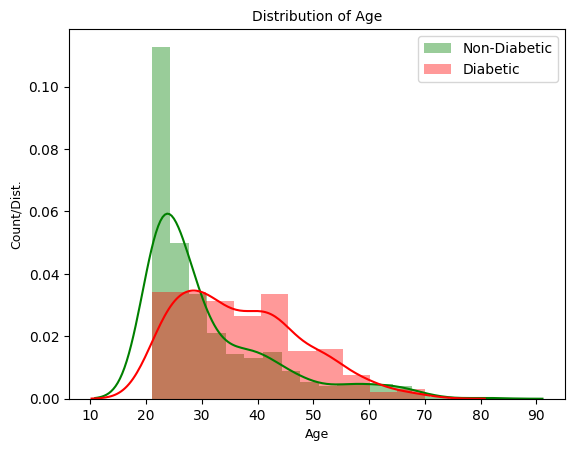

In [26]:
plot2(df,df['Age'])
# This can be a good observation
# People between 40-50 are more prone to diab as total no. of people in that age group are less


### CO-RELATION

In [ ]:
plt.fig(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()
# Considering out outcome variable, skinthickness and insulin are least correlated
# Other varibles are also not much correlated.
# One thing that we can make through this is that, we cannot linearly seperate our data
